<a href="https://colab.research.google.com/github/5harad/API201-students/blob/main/lectures/lecture-7-code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 7: Probability distributions I

In [167]:
library(tidyverse)

# set a simple black & white theme for our plots
theme_set(theme_bw())

## Part 1: Rolling dice 

In [168]:
set.seed(1)

In [169]:
outcomes <- c(1, 2, 3, 4, 5, 6)
p <- c(1/6, 1/6, 1/6, 1/6, 1/6, 1/6)

sample(outcomes, 1, prob=p)

[1] 3

In [170]:
sample(outcomes, 1, prob=p)

[1] 4

In [171]:
sample(outcomes, 1, prob=p)

[1] 5

In [172]:
sample(outcomes, 10, prob=p, replace = TRUE)

[1] 1 3 1 1 5 5 2 3 3 6

In [173]:
sample(outcomes, 10, prob=p, replace = TRUE)

[1] 4 6 4 6 1 4 6 1 3 5

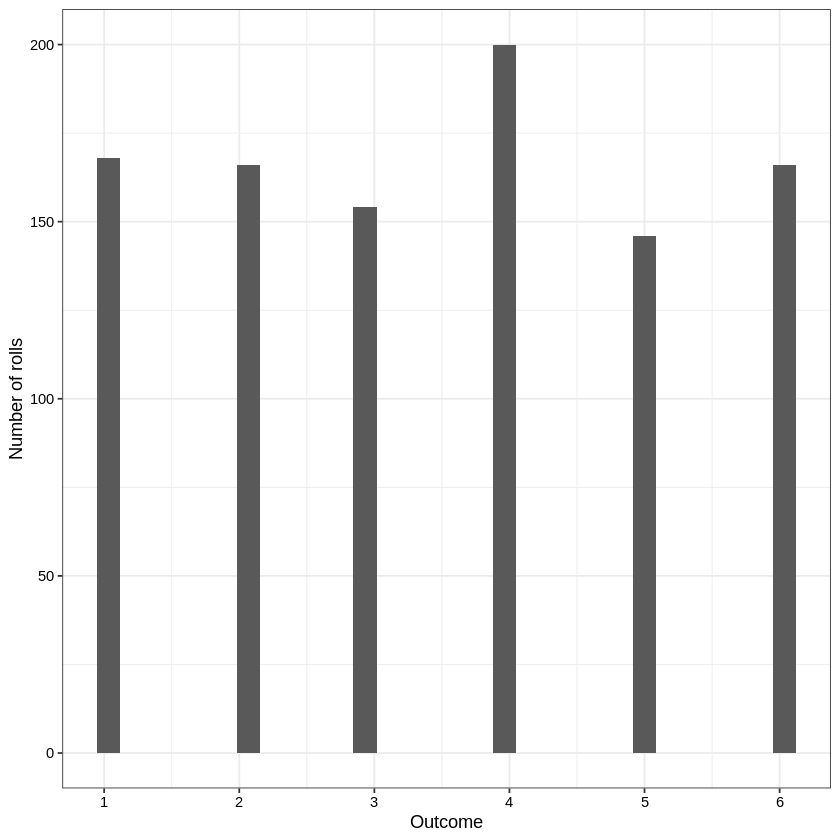

In [174]:
set.seed(1)

rolls <- tibble(
  outcome = sample(outcomes, 1e3, prob=p, replace = TRUE)
)

ggplot(rolls, aes(x = outcome)) + 
  geom_histogram(bins=30) +
  scale_y_continuous('Number of rolls') +
  scale_x_continuous('Outcome', breaks=1:6) +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))

ggsave('rolls.png', width=4, height=4)

We can also simulate rolling a _loaded_ die

In [175]:
outcomes <- c(1, 2, 3, 4, 5, 6)
p <- c(1/10, 1/10, 1/10, 1/10, 1/10, 1/2)

sample(outcomes, 10, prob=p, replace = TRUE)

[1] 3 4 6 1 6 6 3 3 2 4

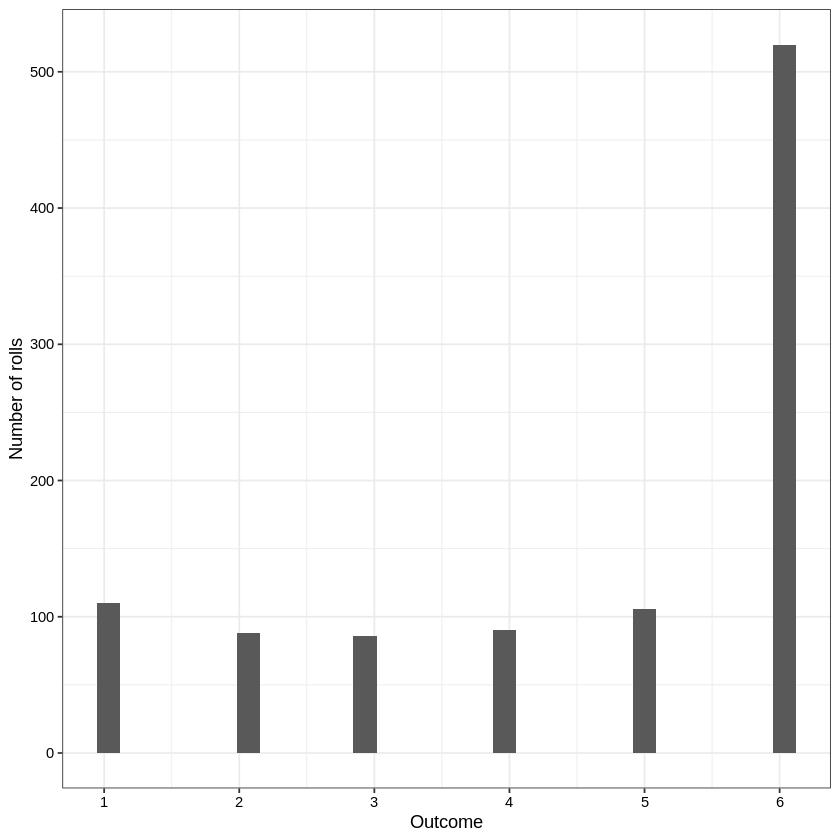

In [176]:
set.seed(1)

rolls <- tibble(
  outcome = sample(outcomes, 1e3, prob=p, replace = TRUE)
)

ggplot(rolls, aes(x = outcome)) + 
  geom_histogram(bins=30) +
  scale_y_continuous('Number of rolls') +
  scale_x_continuous('Outcome', breaks=1:6) +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))

ggsave('loaded_rolls.png', width=4, height=4)

Part 2: Expectation

In [177]:
set.seed(2)

outcomes <- c(0, 1, 2, 3, 4, 5)
p <- c(.1, .15, .4, .2, .1, .05)

X <- sample(outcomes, 1, prob = p)
X

[1] 2

In [178]:
X <- sample(outcomes, 1, prob = p)
X

[1] 1

In [179]:
many_X <- sample(outcomes, 1e5, prob = p, replace = TRUE)

In [180]:
mean(many_X)

[1] 2.20134

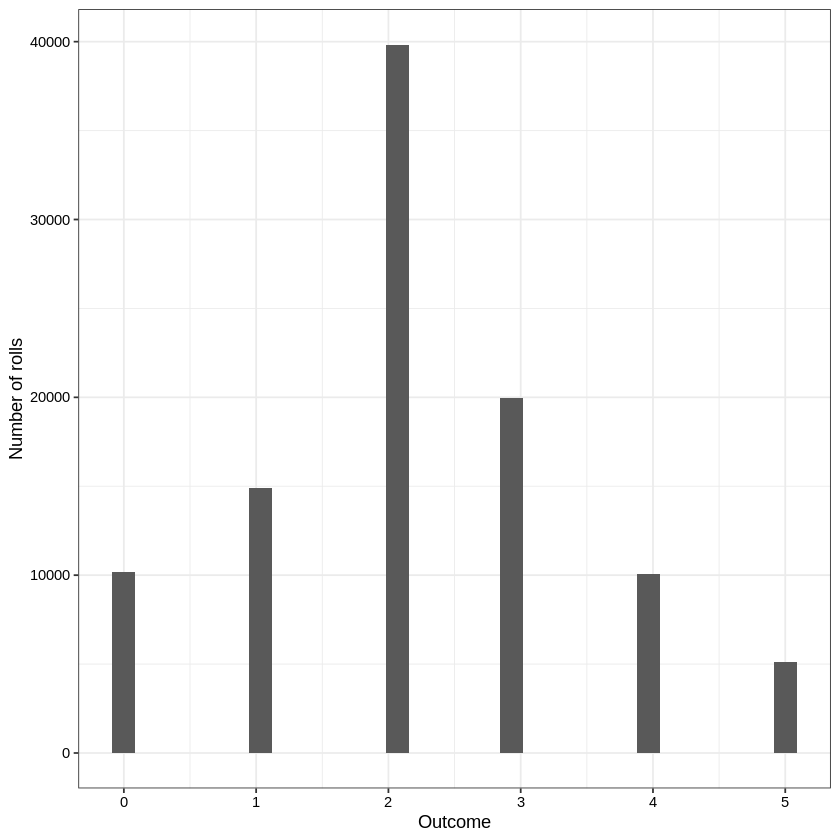

In [181]:
ggplot(tibble(outcome = many_X), aes(x = outcome)) + 
  geom_histogram(bins=30) +
  scale_y_continuous('Number of rolls') +
  scale_x_continuous('Outcome', breaks=0:5) +
  theme(axis.text.x = element_text(color="black"),
          axis.text.y = element_text(color="black"))

ggsave('tornadoes.png', width=4, height=4)

In [182]:
tibble(num_tornadoes = many_X) %>%
  count(num_tornadoes) %>%
  mutate(fraction = n / 1e5)

num_tornadoes,n,fraction
<dbl>,<int>,<dbl>
0,10168,0.10168
1,14886,0.14886
2,39838,0.39838
3,19954,0.19954
4,10060,0.10060
5,5094,0.05094


In [183]:
0 * 0.10168 + 1 * 0.14886 + 2 * 0.39838 + 3 * 0.19954 + 4 * 0.10060 + 5 * 0.05094


[1] 2.20134

In [186]:
many_X <- rbernoulli(1e5, p=1/3)
mean(many_X)

[1] 0.33312